# Exploring Why Civil Resistance Works

For more than a century, from 1900 to 2006, campaigns of nonviolent resistance were more than twice as effective as their violent counterparts in achieving their stated goals. By attracting impressive support from citizens, whose activism takes the form of protests, boycotts, civil disobedience, and other forms of nonviolent noncooperation, these efforts help separate regimes from their main sources of power and produce remarkable results, even in Iran, Burma, the Philippines, and the Palestinian Territories.

In this report, some of the findings of this research done by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan will be replicated. The results of the reseach were then published as a book with the name [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw)

You can find the data at <https://www.ericachenoweth.com/wp-content/uploads/2012/01/Data-and-Replication-Files-3.zip> and data documentation at <https://www.ericachenoweth.com/wp-content/uploads/2019/07/WCRW-Appendix.pdf>.

---

> Ioannis (Ion) Petropoulos, 8160107 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> ionpetro@gmail.com

Firstly, we import the python libraries needed for the data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In order to read the data, place them on a folder **data**

In [2]:
filepath = 'data/WCRWreplication.dta'
data = pd.read_stata(filepath)

The dataset consists of 323 rows and 85 columns.

In [3]:
data.shape

(323, 85)

## Frequency of nonviolent and violent campaigns

We will replicate a plot included in the book, where we can observe the number of nonviolent and violent campaigns that took place globally over the decades  

In [4]:
#group by end year and violent indicator
violgroup = data.groupby(['eyear', 'viol']).count()
violgroup.reset_index(inplace=True)
violgroup = violgroup.iloc[:, 0:3]
violgroup.rename(columns={'defect' : 'counter'}, inplace=True)
violgroup.head()

,eyear,viol,counter
0,1902,1,2
1,1903,1,3
2,1904,1,1
3,1905,1,2
4,1906,1,3


We only need to use the violent column, where 1 indicates violent campaigns and 0 indicated inviolent (civil) ones.

In [5]:
violent = violgroup.loc[violgroup.viol == 1]
nonviolent = violgroup.loc[violgroup.viol == 0]

In [6]:
nonviolent.head()

,eyear,viol,counter
11,1919,0,1
16,1923,0,1
23,1931,0,1
30,1944,0,4
32,1945,0,1


We groupby the decade the years belong to for each campaign type

In [7]:
violdec = violent.groupby((violent.eyear//10)*10).sum()
nonvioldec = nonviolent.groupby((nonviolent.eyear//10)*10).sum()
nonvioldec.iloc[:, 1:3].head()

,viol,counter
eyear,,
1910,0,1
1920,0,1
1930,0,1
1940,0,5
1950,0,9


We observe that there are no data for the 1900 - 1910 decade, thus we have to insert it hardwritten.

In [8]:
nonv = np.insert(nonvioldec.counter.values, 0, 0)

We can now create the plot

Text(0, 0.5, 'campaigns')

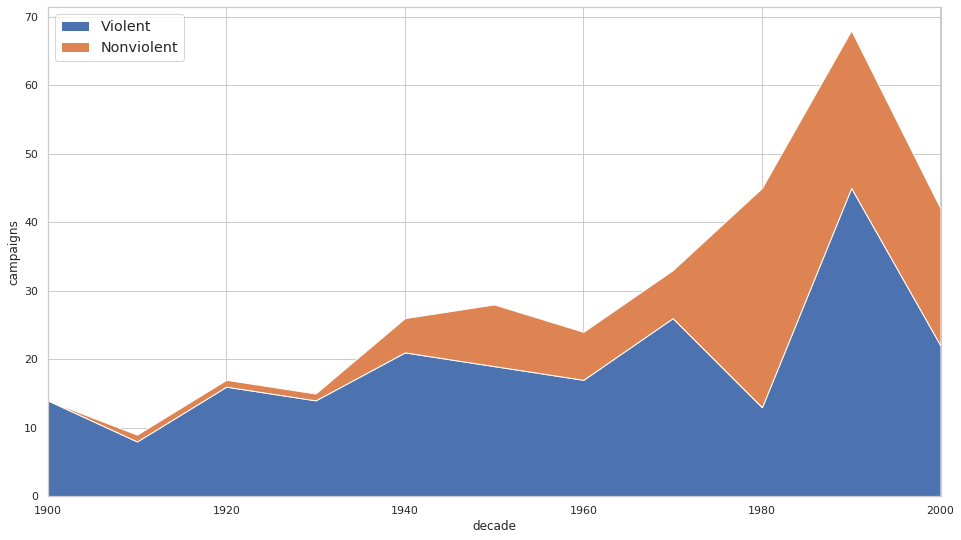

In [9]:
sns.set(style="whitegrid")
v = violdec.counter.values
plt.figure(figsize=(16,9))
plt.stackplot(violdec.index, v, nonv, labels=['Violent', 'Nonviolent'])
plt.legend(loc='upper left', fontsize = 'large')
plt.xlim(1900, 2000)
plt.xlabel('decade')
plt.ylabel('campaigns')

Let's now create the original plot of the book, where the outcome is clearer 

Text(0, 0.5, 'campaigns')

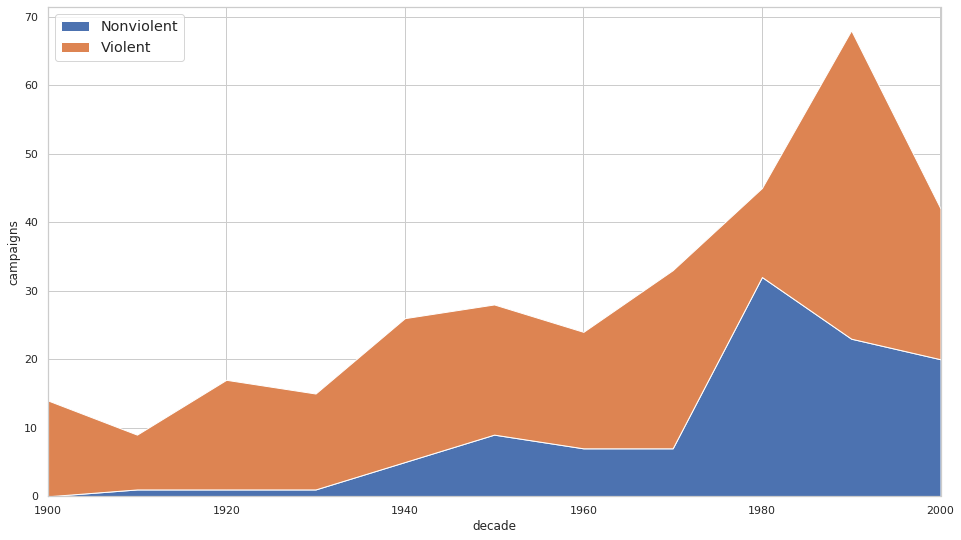

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,9))
plt.stackplot(violdec.index, nonv, v, labels=['Nonviolent', 'Violent'])
plt.legend(loc='upper left', fontsize = 'large')
plt.xlim(1900, 2000)
plt.xlabel('decade')
plt.ylabel('campaigns')

From the plot above, we can clearly observe that:

* There is an increasing number of civil campaigns as time progresses
* Till 1930, there were almost no civil campaigns on a global basis

##  Number of Nonviolent Campaigns and Percentage of Success

We will now attempt to create a plot showing the percentage of success of nonviolent resistances over time. We will only include data after 1940s

A campaign is considered successful, when the outcome column is marked with 5

In [11]:
non = data.loc[(data.viol == 0) & (data.outcome == 5)]
group = non.groupby('eyear').count()
group.reset_index(inplace=True)
#group by each decade
groupdec = group.groupby((group.eyear//10)*10).sum()
groupdec.iloc[3:6, 2:3]

,outcome
eyear,
1950,3
1960,3
1970,4


The percentage of success equals to:

$$\text{Percentage of Success} = \frac{\text{Number of successful nonviolent campaigns}}{\text{Total number of nonviolent campains}}$$

In [12]:
perc = groupdec.outcome/nonvioldec.counter

In [13]:
# get the values from 1940 and after
y2 = perc[3:]
y2

eyear
1940    0.400000
1950    0.333333
1960    0.428571
1970    0.571429
1980    0.531250
1990    0.521739
2000    0.700000
dtype: float64

We can now draw the plot

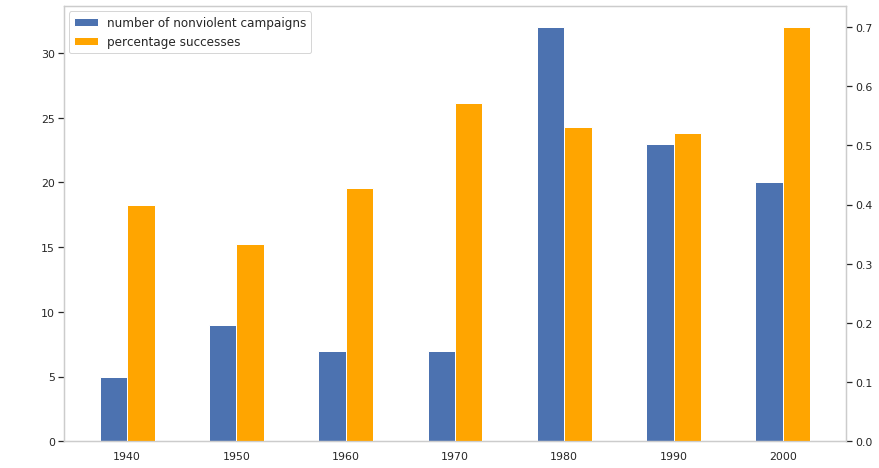

In [14]:
width = 2.5  # the width of the bars
# get the values from 1940 and after
x = nonvioldec.index[3:]
y1 = nonvioldec.counter.values[3:]
fig = plt.figure(figsize=[14,8])
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
number = ax1.bar(x - width/2, y1, width, color='b', label='number of nonviolent campaigns')
ax1.grid(False)
percentage = ax2.bar(x + width/2, y2, width, color='orange', label='percentage successes')
ax2.grid(False)
fig.legend(bbox_to_anchor=(0.0623, 0.803), loc='upper left', fontsize=12)

Non violent resistance became twice as effective from 1940 to 2000 reaching 70% success rate. 

## Success rate per decade

Let's now summarize the result by ploting both the nonviolent and violent campains and comparing the rates

We have to do the same thing as before, but now for the violent insurgencies

In [15]:
vio = data.loc[(data.viol == 1) & (data.outcome == 5)]
group = vio.groupby('eyear').count()
group.reset_index(inplace=True)
groupdec2 = group.groupby((group.eyear//10)*10).sum()
groupdec2.iloc[3:6, 2:3]

,outcome
eyear,
1930,2
1940,7
1950,7


Calculate the violent percentage

In [16]:
vioperc = groupdec2.outcome/violdec.counter

In [17]:
x = vioperc.index[4:]
y1 = vioperc[4:]
# get all except the first 3 since there are no data for 1900
y2 = perc[3:]
y1

eyear
1940    0.333333
1950    0.368421
1960    0.235294
1970    0.384615
1980    0.384615
1990    0.266667
2000    0.136364
dtype: float64

Let's plot!

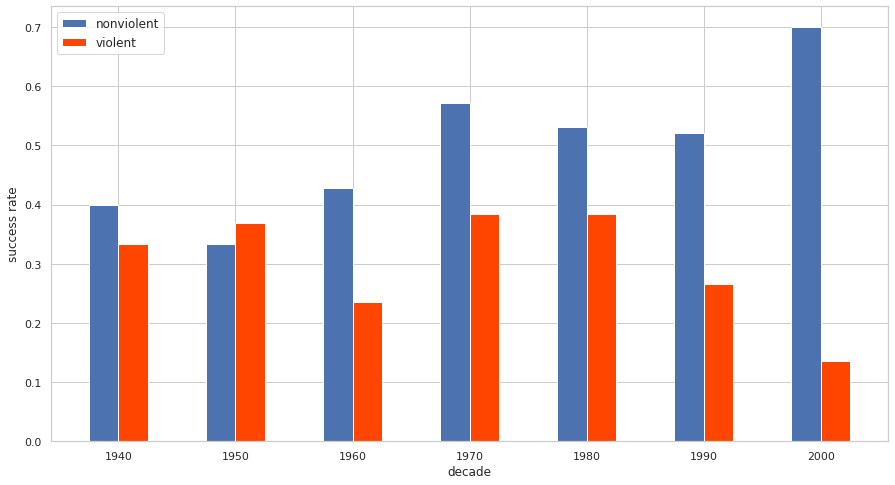

In [18]:
width = 2.5  # the width of the bars

fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111)
b2 = ax.bar(x + width/2, y1, width, color='orangered')
b1 = ax.bar(x - width/2, y2, width, color='b')

plt.xlabel('decade')
plt.ylabel('success rate')
ax.legend((b1[0], b2[0]), ('nonviolent', 'violent'), fontsize=12)


According to the diagram above, we can easily assume that the success rate of non violent campaignes has been increasing over time and the rate of failure for violent campaignes has also been increasing.

So maybe civil resistance can be used at almost any context. Anywere where violent resistance is possible, non violent resistance is also probably possible! 

## Twenty five largest resistance campaignes from 1900 to 2000

We will attemp to create a table with the twenty-five largest resistance campaigns, for all years, based on their number of members at highest point (peak membership).

In [19]:
peakcamp = data.loc[:, ['peakmembership', 'eyear', 'byear', 'location', 'target', 'viol', 'success']]

peakcamp.sort_values(by='peakmembership', ascending=False)[:25]

,peakmembership,eyear,byear,location,target,viol,success
257,4500000.0,1945,1937,China,Japanese occupation,1,0
206,2000000.0,1979,1977,Iran,Shah Reza Pahlavi,0,1
311,2000000.0,1983,1986,Philippines,Ferdinand Marcos,0,1
289,1000000.0,1988,1988,Burma,military junta,0,0
265,1000000.0,1989,1989,China,Communist regime,0,0
262,1000000.0,1968,1967,China,anti-Maoists,1,0
255,1000000.0,1949,1922,China,Kuomintang regime,1,1
10,1000000.0,2006,2006,Mexico,Calderon regime,0,0
228,1000000.0,2005,2005,Lebanon,Syrian forces,0,1
141,1000000.0,1999,1993,Nigeria,Military rule,0,1


## And now... some Greek History

<img src="history1-thumb-large.jpg">

During the **National Assembly Elections** of October 29, 1961, Konstantinos Karamanlis and his party, the ERE, won their third consecutive election victory and formed a self-governing government. **George Papandreou**, who heads the Union Center, categorically refuses to recognize the election result by denouncing it as a product of violence and fraud. Thus George Papandreou **inaugurates** the Endless Race (Ανένδοτος Αγώνας).

<img src="papandreou.png">

During the Endless Race, a large number of rallies and other mobilizations were organized. Many speeches were also made by G. Papandreou, where his greeting to the people: **"Long live the Democracy"** remained characteristic. Eventually the strategy of Endless Warfare bore fruit as it added greater cohesion to the newly formed Union Center, which won the November 3, 1963 election.

## The Effect of Participation on the Probability of Campaign Success

In order to calculate the effect of participation on the probability of success, we want to clear our data from NaN values (even if the logit method doesn't take them into consideration)

In [20]:
clear_data = data.loc[data.mempc.notna()]

We can calculate the probability of success beforehand

In [21]:
data.success.sum()/data.success.count()

0.34674922600619196

But we need more insights, so let's see only for the percentage of members, logged, if the separation of successful and unsuccessful campaigns is clear.

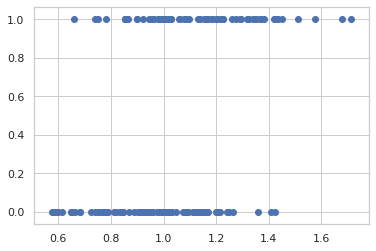

In [22]:
plt.scatter(data.mempc, data.success)

* It doesn't seem like it.
* Let's explore our target value and visualize it

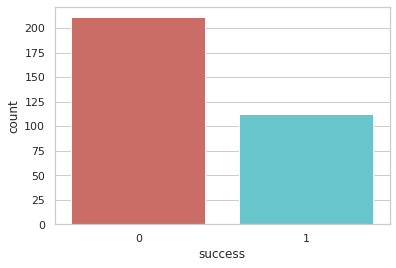

In [23]:
data.success.value_counts()
sns.countplot(x = 'success', data = data, palette = 'hls')
plt.show()

* It looks like we can more unsuccessful cases than successful ones, so the two classes are inbalanced.
* If we wanted to make predictions with it, maybe we should use the [SMOTE](https://arxiv.org/pdf/1106.1813.pdf) (Synthetic Minority Oversampling Technique) algorithm to create balance data on the training set.

* For now, let's apply binary logistic regression using ```stats models library```
* Note that the variable ```mempc``` is on a logarithmic scale, which it not very helpful for the explanation of the results. Thus, we will convert it to linear scale, by raising with base = 10

In [54]:
from statsmodels.formula.api import logit

linear_clear_data = clear_data.copy()
#convert mempc to linear scale
linear_clear_data.mempc = 10**clear_data.mempc

linear_success_mod = logit("success ~ mempc + lnpop", linear_clear_data).fit()
linear_success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.596045
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.128     
Dependent Variable: success          AIC:              200.3106  
Date:               2019-11-29 09:04 BIC:              209.5918  
No. Observations:   163              Log-Likelihood:   -97.155   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      6.8108e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -2.7593    1.4376  -1.9194  0.0549  -5.5769  0.0583
mempc           0.1529    0.0362   4.2269  0.0000   0.0820  0.2238
lnpop           0.0657    0.1246   0.5269  0.5983  -0.1786  0.3099
=================================================================

"""

There are several outcomes from the summary of the model:

* The output indicated that membership percentage is significantly associated with the probability of succeeding on a campaign. Holding ```lnpop``` on a fixed value, one additional percent of members participating on the campaign is estimated to increase the log-odds by **0.1529** so the odds ratio by $e^{0.15} \approx 1.16$ therefore the odds of having a successful campaign by about **16%**
* The ```p-value``` of ```mempc``` is 0, showing that mempc is a good indicator for success and the result calculated by ```mempc``` is **statistically significant**
* Holding ```mempc``` on a fixed value, one additional percent of logged population will increase the odds by $e^{0.06} \approx 1.06$ or 6%, which is not that big of a deal. The variable is not a good predictor for the success (since the ```p-value is 0.6``` but is used for controlling the result
* Intercept is the log-odds of having a successful campaign when all other variables are held to zero. In other words, the intercept from the model with no predictor variables is the estimated log odds of a successful campaign for the whole population of interest. Let's also calculate the probability: $$p = \frac {e^{-2.75}}{1+{e^{-2.75}}} = 0.06$$

To calculate the Probability of success, we need to calculate the Probability 

$$ p(x) = \frac {1}{1+e^{-(\beta_0 + \beta_1 x)}} $$

of the Logistic model

$$ log\frac{p}{1 - p}  = \beta_0 + \beta_1 x$$

where 

$$\beta_0 + \beta_1 x$$ are the fitted values

Text(0.5, 0, 'Participants per capita, logged')

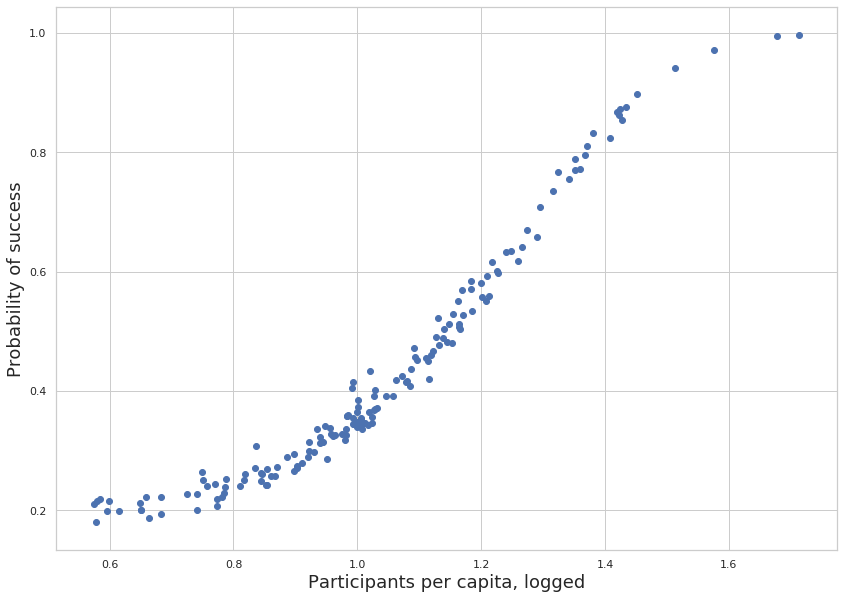

In [56]:
X = clear_data[['mempc' , 'lnpop']]
# y = success_mod.predict(X)
y = 1/(1+ np.exp(-linear_success_mod.fittedvalues))
x = X.iloc[:, 0]
plt.figure(figsize=[14,10])
plt.scatter(x,y)
plt.ylabel('Probability of success', fontsize=18)
plt.xlabel('Participants per capita, logged', fontsize=18)

We can also draw the regression line

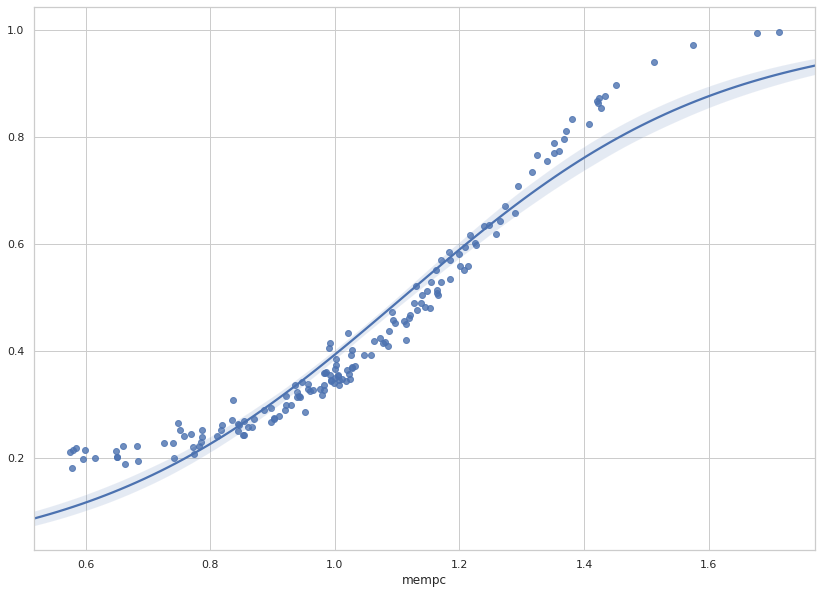

In [57]:
plt.figure(figsize=[14,10])
sns.regplot(x, y, data=data, logistic=True)

### QUESTION 6

From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign.

We want to calculate the percentage of the population that is the tipping point for success. We can turn this question into a classification problem. In this problem, we are looking to classify the percentage of populations (mempc) to either successfull of not. 

After that, we have to conclude to a threshold that classifies the campaigns with a high True Positive Rate and a low False Positive Rate.

In other words, I am looking for the optimal threshold on a ROC curve. We will go back to the logged mempc, run the logistic model and create the ROC curve using ```sklearn library```

In [63]:
success_mod = logit("success ~ mempc + lnpop", clear_data).fit()
success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2019-11-29 09:07 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

Let's import the sklearn metrics library

In [64]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

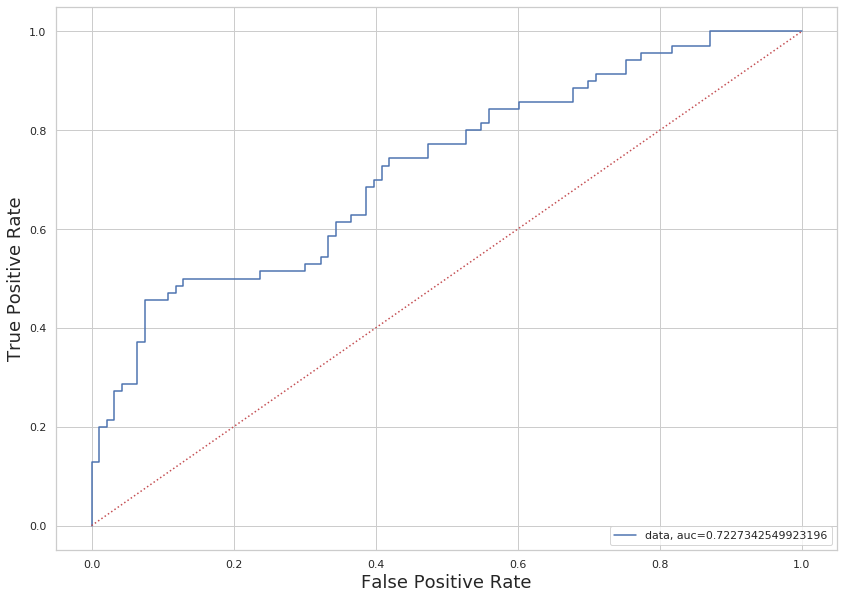

In [80]:
y_pred_proba = success_mod.predict()
fpr, tpr, thresholds = metrics.roc_curve(clear_data.success,  success_mod.predict(X))
auc = metrics.roc_auc_score(clear_data.success, success_mod.predict(X))
plt.figure(figsize=[14,10])
plt.plot(fpr,tpr,label="data, auc="+str(auc))
z = np.linspace(0, 1, 1000)
plt.ylabel('True Positive Rate', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=18)
plt.plot(z, z, ':r')
plt.legend(loc=4)
plt.show()

The optimal cutoff point is where TPR is high and FPR is low, therefore TPR - (1- FPR) is close to zero

In [73]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()]

    return list(roc_t['threshold']) 

threshold = Find_Optimal_Cutoff(clear_data.success,success_mod.predict(X))

In [77]:
opt_threshold = threshold[:1]

Let's plot it on the ROC diagram

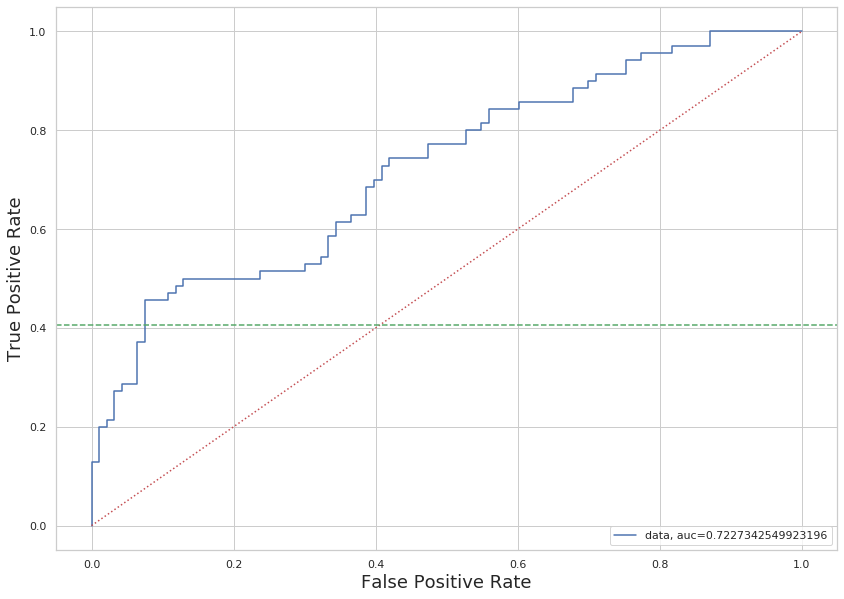

In [83]:
y_pred_proba = success_mod.predict()
fpr, tpr, thresholds = metrics.roc_curve(clear_data.success,  success_mod.predict(X))
auc = metrics.roc_auc_score(clear_data.success, success_mod.predict(X))
plt.figure(figsize=[14,10])
plt.plot(fpr,tpr,label="data, auc="+str(auc))
z = np.linspace(0, 1, 1000)
plt.plot(z, z, ':r')
plt.legend(loc=4)
plt.ylabel('True Positive Rate', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=18)
plt.axhline(y=opt_threshold, color='g', linestyle='--')
plt.show()

Now that we found the 

Text(0.5, 0, 'Participants per capita, logged')

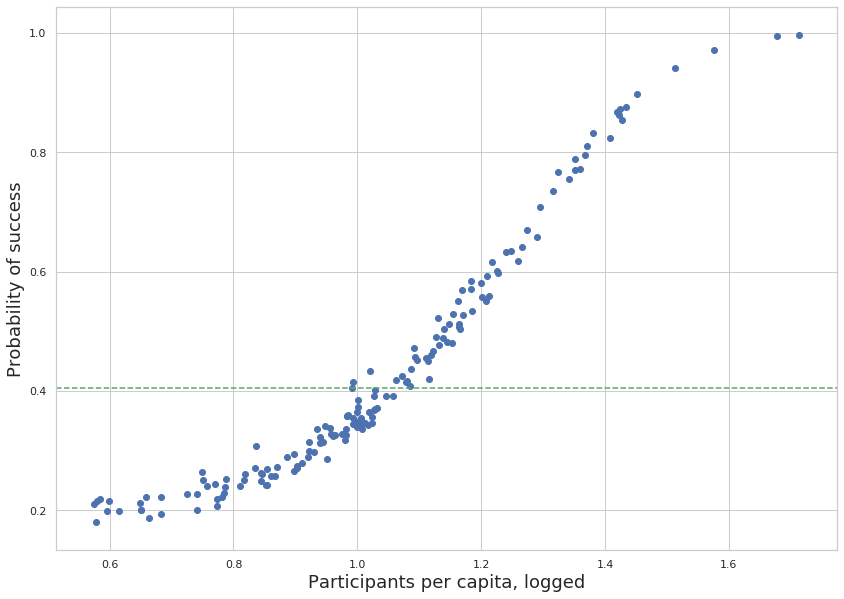

In [84]:
X = clear_data[['mempc' , 'lnpop']]
# y = success_mod.predict(X)
y = 1/(1+ np.exp(-linear_success_mod.fittedvalues))
x = X.iloc[:, 0]
plt.figure(figsize=[14,10])
plt.scatter(x,y)
plt.axhline(y=opt_threshold, color='g', linestyle='--')
plt.ylabel('Probability of success', fontsize=18)
plt.xlabel('Participants per capita, logged', fontsize=18)

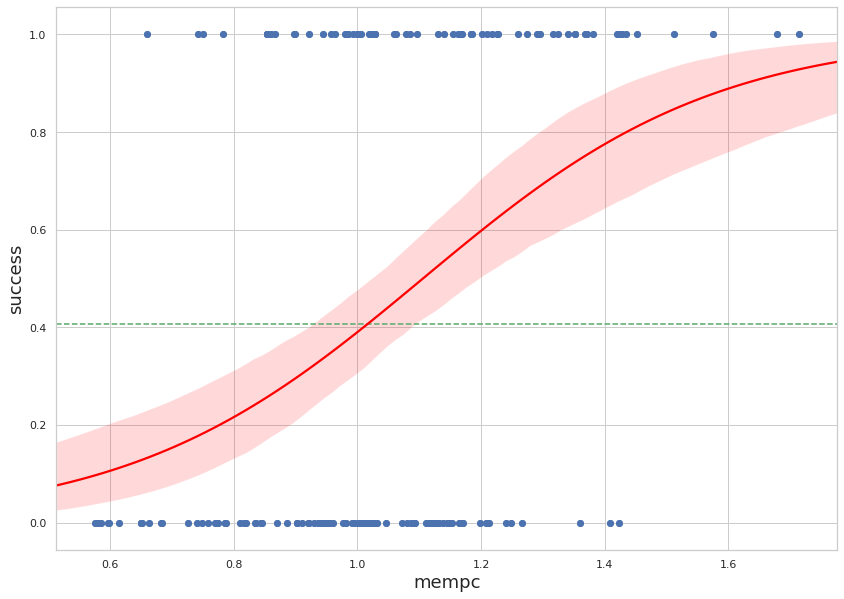

In [87]:
X = clear_data[['mempc' , 'lnpop']]
y = clear_data.success
x = X.iloc[:, 0]
plt.figure(figsize=[14,10])
plt.scatter(x,y)
plt.ylabel('Probability of success', fontsize=18)
plt.xlabel('Participants per capita, logged', fontsize=18)
plt.axhline(y=opt_threshold, color='g', linestyle='--')
sns.regplot(x, y, line_kws={'color': 'red'},data=data, logistic=True)

* So the percentage of the participants logged, would be around 1.0 which is equal to $10^{1.0} \approx$ 10%.
* **This means that no government could survive, if 10% of the population rose up against it.**

Watching [Erica Chenoweth at TEDxBoulder](https://www.youtube.com/watch?v=YJSehRlU34w), she mentioned that the percentage is less the 10%, it's actually 3.5% (what she is calling **"The 3.5% Rule"**) so there is some more work to do here. And this 3.5% threshold has also been proved in many cases like the [Singing Revolution in Estonia](https://en.wikipedia.org/wiki/Singing_Revolution) in the late 1980s and the [Rose Revolution in Georgia](https://en.wikipedia.org/wiki/Rose_Revolution) in the early 2003.

## Question 7

In [51]:
success_mod = logit("success ~ nonviol + tpolity + lnpop + lmembers", clear_data).fit()
success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2019-11-29 09:02 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1085    1.4130  -0.0768  0.9388  -2.8779   2.6609
nonviol        0.9048    0.4636   1.9517  0.0510  -0.0038   1.8134
tpolity        0.0520    0.0298   1.7439  0.0812  -0.0064   0.1104
lnpop         -0.4363    0.1423  -3.0671  0.0022  -0.7151  -0.1575
lmembers       0.3751    0.1282   2.9264  0.0034   0.1239   0.6263
=================================================================

"""

In [52]:
data.columns

Index(['defect', 'outcome', 'peakmembership', 'eyear', 'byear', 'location',
       'campaign', 'target', 'lccode', 'tccode', 'nonviol', 'viol', 'fselfdet',
       'regchange', 'secession', 'other', 'success', 'limited', 'failure',
       'ongoing', 'middleeast', 'americas', 'asia', 'fsu', 'europe', 'africa',
       'lpolity', 'tpolity', 'lgovcap', 'tgovcap', 'regviol', 'violsim',
       'extfor', 'statesup', 'regaid', 'sdirect', 'deltatpolity', 'deltatgdp',
       'lduration', 'lmembers', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8',
       't9', 't10', 't11', 'cw', 'postcw', 'ixnNVmem', 'rgdppc',
       'growthrgdppc', 'lupop', 'recur5', 'recur10', 'polityt10', 'polityt1',
       'polityt5', 'politychanget10', 'politychanget1', 'politychanget5',
       'politychanget0', 'authdum', 'deltatgovcap', 'memdum', 'lnpop',
       'ixnNVpc', 'lpolity1', 'lcinc1', 'lgdppc', 'wars', 'lmtnest', 'ef',
       'loclpolity1', 'loclcap1', 'loclcap2', 'loclcap3', 'loclcap4', 'mempc',
       'demdum',

In [53]:
success_mod = logit("success ~ nonviol + lccode", data).fit()
success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.603612
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.065     
Dependent Variable: success          AIC:              395.9336  
Date:               2019-11-29 09:02 BIC:              407.2666  
No. Observations:   323              Log-Likelihood:   -194.97   
Df Model:           2                LL-Null:          -208.47   
Df Residuals:       320              LLR p-value:      1.3696e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.7061    0.2976  -2.3724  0.0177  -1.2894  -0.1228
nonviol        1.2019    0.2509   4.7903  0.0000   0.7101   1.6937
lccode        -0.0008    0.0005  -1.4487  0.1474  -0.0018   0.0003
=================================================================

"""